### calculate your portfolio stats with ease

Trying to calculate the Sharpe and Sharpe changes if we were to add or take out a new asset/allocation. With current corona pandemic, i predict the sharpe would look pretty bad with low rp and high volatility but i hope the data will surprise me.

Feel free to run the whole code but remember there are inputs you need to provide in order to keep the script going.

In [1]:
#Get Ticker
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
#yf.pdr_override() # fix yf--
import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\vinhnguyenvn2401\Anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



### Inputs

In [2]:
while True:
    try:
        # Note: Python 2.x users should use raw_input, the equivalent of 3.x's input
        start_year = int(input("Start Year:"))
        start_month= int(input("Start Month:"))
        start_day= int(input("Start Day:"))
        end_year = int(input("End Year:"))
        end_month= int(input("End Month:"))
        end_day= int(input("End Day:"))
    except ValueError:
        print("Sorry, please only input appropriate numbers.")
        #better try again... Return to the start of the loop
        continue
    if start_year > end_year:
        print("Sorry, starting year must be lesser than or equal to ending year.")
        continue
    else:
        #we're ready to exit the loop.
        break


Start Year:2020
Start Month:1
Start Day:1
End Year:2020
End Month:6
End Day:24


In [3]:
asset_list = []
while True:
    inp = input("Input asset ticker (Enter empty input to finish): ")
    if inp == "":
        break
    asset_list.append(str(inp))
print ("Total assets: " + str(len(asset_list)))

Input asset ticker (Enter empty input to finish): vnq
Input asset ticker (Enter empty input to finish): vnqi
Input asset ticker (Enter empty input to finish): vti
Input asset ticker (Enter empty input to finish): voog
Input asset ticker (Enter empty input to finish): esgv
Input asset ticker (Enter empty input to finish): voov
Input asset ticker (Enter empty input to finish): 
Total assets: 6


In [4]:
#port value at beginning of period
beg_asset_dollar = input("Input hypothetical portfolio beginning value(10,000 for example): ")

Input hypothetical portfolio beginning value(10,000 for example): 4000


### Set starting and ending date

In [5]:
start_sp = datetime.datetime(start_year,start_month,start_day)
end_sp = datetime.datetime(end_year,end_month,end_day)

### Download assets

In [6]:
d = {}
for name in asset_list:
    d[name] = yf.download(name,start_sp, end_sp)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
# #Downloading some of the assets, in this case indexes
# sp500 = yf.download('^GSPC',start_sp, end_sp)
# vnq = yf.download('VNQ',start_sp, end_sp)
# voog = yf.download('VOOG',start_sp, end_sp)
# vti = yf.download('VTI',start_sp, end_sp)

Quick plot on SP500 and 'corona time'

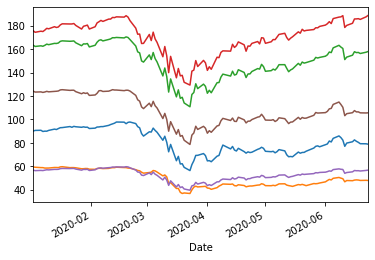

In [8]:
for name, df in d.items():
    df['Adj Close'].plot()

In [9]:
#Get normed returns
for name, df in d.items():
    df['Normed Return']= df['Adj Close'] /df.iloc[0]['Adj Close']

In [10]:
list_df_v = []
for df in d:
    list_df_v.append(df)

In [11]:
allo=[]
for i in range(len(asset_list)):
    allo.append(float(input("Allocation for asset respectively with asset list: ")))

Allocation for asset respectively with asset list: 0.2
Allocation for asset respectively with asset list: 0.2
Allocation for asset respectively with asset list: 0.2
Allocation for asset respectively with asset list: 0.2
Allocation for asset respectively with asset list: 0.1
Allocation for asset respectively with asset list: 0.1


In [12]:
ls= list(d.keys())

In [13]:
all_pos_vals=[]
for i in range(len(asset_list)):
    d[ls[i]][['Allocation']] = d[ls[i]][['Normed Return']]*allo[i]
    d[ls[i]][['Position Value']] = d[ls[i]][['Allocation']]*allo[i]
    all_pos_vals.append(d[ls[i]][['Position Value']])

In [14]:
# for stock_df, allo in zip((vnq, vti, voog),[.25,.5,.25]):
#     stock_df['Allocation'] = stock_df['Normed Return']*allo
# # value of each position (beg_asset_dollar is the starting portfolio)
# for stock_df in (vnq, vti, voog):
#     stock_df['Position Value'] = stock_df['Allocation']*beg_asset_dollar

In [15]:
# create list of all position values
#all_pos_vals = [vnq['Position Value'], vti['Position Value'], voog['Position Value']]

# concatenate the list of position values
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = list_df_v

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)

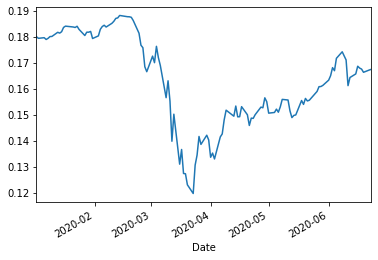

In [16]:
portfolio_val.Total.plot()

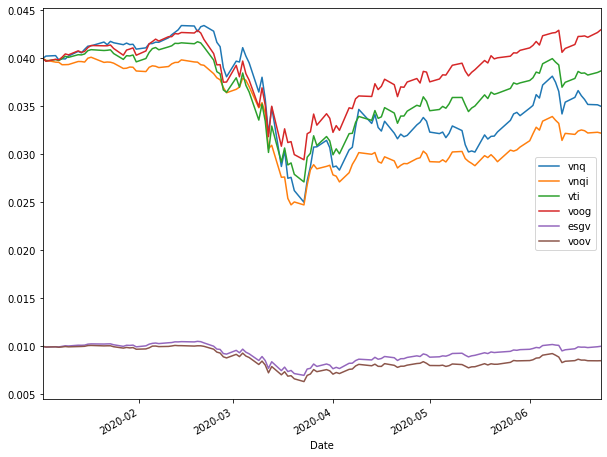

In [17]:
portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))

In [18]:
# Daily Return
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [19]:
# average daily return
portfolio_val['Daily Return'].mean()

# standard deviation
portfolio_val['Daily Return'].std()

0.028532639323339593

In [20]:
# cumulative portfolio return
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)

In [21]:
cum_return

-6.978384577489116

In [22]:
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
ASR = (252**0.5) * sharpe_ratio
ASR

-0.10918923529613643

###### Ideally you want a >1 Sharpe ratio. Any more than 2, 3 is really good.

### Optimization Not working yet! ^_^

In [23]:
stocks = pd.concat([vnq['Adj Close'],vti['Adj Close'],voog['Adj Close']], axis=1)
stocks.columns = ['vnq','vti','voog']

NameError: name 'vnq' is not defined

In [ ]:
stocks